# RK Model 
- The model is an attempt to understand the influence of physical processes in cold regions. A 2-D transect along the Yakou catchement (Tibetan Plateau, Heihe river basin) is the field site.   
- The notebook describes the model configurations, prepares the dataset (if required), extracts the output and plots it. 

### Brief description:

**Goal – To test the sensitivity of Van Genuchten parameters to the subsurface temperature and subsurface moisture data considering air temperature as the top boundary condition (Scenario IV) The physical parameters (base porosity, pore compressiblity, permeability, solid density) for Peat, Mineral and Bedrock is varied [three simulations each]. The focus of this notebook is given to porosity**

- T : 1 year (365 days) - Daily time steps 
- Processes: Subsurface permafrost - flow, energy
- Mesh: Pseudo 1-D column with three layers - organic, mineral, and bedrock layer with increasing cell sizes.
- Initial conditions : -1.0 m – hydrostatic head (in m) to represent the permafrost table level or active layer, 264.15 K (-3°C).
- Boundary conditions :  Top - **Actual daily air temprature (2017) **
- Note that the VGc properties of bedrock are less significant since they are mostly saturated.

- Parameters:
    - VGc - Peat: alpha – 0.01, n – 1.4, wr = 0.1
    - VGc - Mineral: alpha – 0.0002, n – 1.4, wr = 0.05
    - VGc - Bedrock: alpha – 0.03, n – 2, wr = 0.05
    - Thermal conductivity: Peat – L_dry – 0.07 W m^-1 K^-1, alpha_frozen = 1.0, alpha_unfrozen = 0.5
    - Thermal conductivity: Mineral & Bedrock – L_dry – 0.29 W m^-1 K^-1, alpha_frozen = 1.0, alpha_unfrozen = 0.5
    - Porosity, Compressible porosity: Peat – [0.3, 0.5, 0.9], [1.00E-08, 1.00E-07, 1.00E-06] Pa^-1; 
    - Porosity, Compressible porosity: Mineral – [0.2, 0.3, 0.5], [1e-09, 1e-08, 1e-07] Pa^-1;
    - Porosity, Compressible porosity: Bedrock – [0.2, 0.3, 0.5], [1e-10, 1e-09, 1e-08] Pa^-1;
    - Permeability: Peat – [1e-12, 1e-11, 1e-10] m^2, 
    - Permeability: Mineral – [1e-14, 1e-13, 1e-12] m^2
    - Permeability: Bedrock – [1e-15, 1e-14, 1e-13] m^2
    - Density: Peat – [500, 700, 900] kg/m^3
    - Density: Mineral – [1700, 1900, 2300] kg/m^3
    - Density: Bedrock – [1500, 2000, 2500] kg/m^3.


**The standard Physical parameter values (The values change based on the simulation):
    - Peat: Porosity - 0.5, Compressible porosity - 1.00E-07, Permeability - 1e-11, Density - 700
    - Mineral: Porosity - 0.3, Compressible porosity - 1.00E-08, Permeability - 1e-13, Density - 1900
    - Bedrock: Porosity - 0.3, Compressible porosity - 1.00E-09, Permeability - 1e-14, Density - 2000**

- Observations:
    - Temperature [K] @ 0.01 m, 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m 5 m, 10 m, 20 m, 30 m, 40 m.
    - Saturation liquid [%] @ 0.01 m, 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m 5 m, 10 m.
    - Saturation ice [%] @ 0.01 m, 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m 5 m, 10 m.

- I/O files:
    - Xml file: Case1_B_IV_Phy_{props}{parameter_number}.xml
    - Output folders (.demo file): 
        - Ppor/Case1_B_IV_Phy_Ppor[1-3].demo
        - Pporc/Case1_B_IV_Phy_Pporc[1-3].demo
        - Pperm/Case1_B_IV_Phy_Pperm[1-3].demo
        - Pden/Case1_B_IV_Phy_Pden[1-3].demo
        - Mpor/Case1_B_IV_Phy_Mpor[1-3].demo
        - Mporc/Case1_B_IV_Phy_Mporc[1-3].demo
        - Mperm/Case1_B_IV_Phy_Mperm[1-3].demo
        - Mden/Case1_B_IV_Phy_Mden[1-3].demo
        - Bpor/Case1_B_IV_Phy_Bpor[1-3].demo
        - Bporc/Case1_B_IV_Phy_Bporc[1-3].demo
        - Bperm/Case1_B_IV_Phy_Bperm[1-3].demo
        - Bden/Case1_B_IV_Phy_Bden[1-3].demo

- Expected results: Since we are not considering the precipitation input at the top, we might not observe significant changes with respect to the Physical properties. However, during the thawing season there is a release of water due to which the change in the parameters might significantly affect the results in the upper layers [Peat and mineral layer]. The changes might be as follows:
    - Porosity : Effects on water flow - As the porosity increases, the water flow within the system will also increase (including moisture), heat advection rate will also increase in the system, however it won't majorly affect a 1-D column (Probably during the thawing season it might have an influence). Effects on heat flow - As the porosity increases, the VWC (can be ice, gas, liquid) also increases. The thermal capacity of the soil medium will decrease, as thermal capacity of liquid < thermal capacity of solids. Therefore, the transfer of heat is reduced which might result in lower temperatures. **Porosity ↑ --> s_w ↑ --> T ↓**     
    - Compressible porosity: Is this the porosity which might change the compressibility of the soil medium? Normally applicable for confined aquifers? Based on this assumption, it might not make a significant impact on the results.   
    - Permeability - Effects on water flow - As the permeability increases, the water flow within the medium will also increase because the darcy velocity is affected. Therefore, we will be expecting more moisture movement. The darcy velocity also increases the thermal advection rate within the medium - which might result in greater temperatures during the summer [when ice thaws]. **Permeability ↑ --> s_w ↑ (hard to say) --> T ↑ (During summer - when T_soil > 0°C)**
    - Soil density: As the soil density increases, the thermal capacity of the soil also increases. This will lead to greater temperatures within the soil column. It's effects on soil moisture is hard to say, it might decreases as density increases. **Soil density ↑ --> s_w ↓ (might decrease) --> T ↑**
    
    
### Detailed description:

#### 1. Physical processes - Cases: Case 1
The physical processes that are considered - Subsurface flow + Subsurface energy (with ice content). A custom strong coupler - 'subsurface permafrost' couples the 'permafrost flow' and 'three-phase energy' PKs. 

<img src='../figures/Case1_process.jpg' width='500' height='500' alt='Case1 physical process' align='center' />  




#### 2. Mesh - Stages: Stage B
Two types of meshes are considered here. The first mesh (Yakou_column.exo) resembles the properties of the hillslope transect that we would like to simulate. Once the meshing issues are resolved, we will be using this mesh. The second mesh is a test mesh that was generated by the ATS developers with similar properties. We will be using this mesh. 

1. Yakou_column.exo - Organic layer (0.25 m), Mineral layer (0.25 - 20 m), Bedrock (20 – 40 m) with increasing cell thickness. [Cell thickness: 0.05 m until 0.25 m (Organic layer); 0.05 m until 0.25 m and increasing cell size by 2 units until 2 m, 2 m - 20 m, we have 2 m cell sizes (Mineral layer); we again have 2 m cell sizes from 20 m - 40 m]

2. tes_org_spinup_column.exo - Organic layer (0.385 m), Mineral layer (2.24 m), Bedrock (42.48 m); Cell thickness starts with a magnitude of 0.01 m and increases in magnitude of 1.2, 1.4 & 1.5 as cell numbers increase from 20, 20 - 26, and >26. 

##### Mesh - Run it with yakou_column.xml once the meshing issues has been resolved.  

Images of 'tes_org_spinup_column.exo':

<img src='../figures/1D_test_org_spinup_column_1.PNG' width='70' height='90' alt='1D_test_org_column_1' align='left' />  

<img src='../figures/1D_test_org_spinup_column_2.PNG' width='120' height='200' alt='1D_test_org_column_2' align='center' />  



#### 3. Scenarios (IC, BC): Scenario I


| :------:               | IC   |  BC    |                 
| :----------------------------------------------------------------- | :------: | :------: |  
| Hydraulic                                                          | Hydrostatic head (-1 m) | - |
| Thermal                                                            |  270.15 K (-3 °C)   |  BCTopAiractualT = actual daily air temperature (2017) |

##### Time period (T) of 5 years (daily time step)


#### 4. Parameters:


|Sl. No.|	Parameter type|	Parameter|	Unit|	Soil type/Water	|Current value|
| --- | --- | --- | --- | --- | --- |
1 |	Variably saturated properties - van Genuchten model |	van Genuchten alpha |	Pa^{-1} |	Peat |	0.001 |
2 |	Variably saturated properties - van Genuchten model |	van Genuchten n |	[-] | Peat |		1.4 |
3 |	Variably saturated properties - van Genuchten model |	residual saturation	| [-] | Peat |		0.1 |
4 |	Variably saturated properties - van Genuchten model |	smoothing interval width 	| [saturation] | Peat |		0.1 |
5 |	Variably saturated properties - van Genuchten model |	van Genuchten alpha	Pa^{-1} | Mineral |	0.0002 |
6 |	Variably saturated properties - van Genuchten model |	van Genuchten n	| [-]	| Mineral |		1.4 |
7 |	Variably saturated properties - van Genuchten model |	residual saturation	| [-]	| Mineral |		0.05 |
8 |	Variably saturated properties - van Genuchten model |	smoothing interval width  |	[saturation] | Mineral |			0.1 |
9 |	Variably saturated properties - van Genuchten model |	van Genuchten alpha	| Pa^{-1}	| Bedrock | 0.03 |
10 | Variably saturated properties - van Genuchten model |		van Genuchten n	| [-] | Bedrock | 2 |
11 | Variably saturated properties - van Genuchten model |		residual saturation	| [-]	| Bedrock | 0.05 |
12 | Variably saturated properties - van Genuchten model |		smoothing interval width 	| [saturation] | Bedrock |0.1 |
13 | 	Permafrost model parameters - fpd permafrost model [Cryosuction] |	minimum dsi_dpressure magnitude |	??	| For the entire model |	1.00E-12 |
14 |	Thermal conductivity evaluator: Three-phase wet/dry |	Thermal conductivity, saturated (unfrozen) | 	[W m^-1 K^-1] |	Peat |	0.67 |
15 |	Thermal conductivity evaluator: Three-phase wet/dry |	Thermal conductivity, dry 	| [W m^-1 K^-1] |	Peat |		0.07 |
16 |	Thermal conductivity evaluator: Three-phase wet/dry |	Unsaturated alpha frozen	| [-]	 |	Peat |	1 |
17 |	Thermal conductivity evaluator: Three-phase wet/dry |	Unsaturated alpha unfrozen	| [-]	|	Peat |	0.5 |
18 |	Thermal conductivity evaluator: Three-phase wet/dry |	Thermal conductivity, saturated (unfrozen) | 	[W m^-1 K^-1] |	Mineral |	1 |
19 |	Thermal conductivity evaluator: Three-phase wet/dry |	Thermal conductivity, dry | [W m^-1 K^-1] |	Mineral |		0.29 |
20 |	Thermal conductivity evaluator: Three-phase wet/dry |	Unsaturated alpha frozen| [-] |	Mineral |		1 |
21 |	Thermal conductivity evaluator: Three-phase wet/dry |	Unsaturated alpha unfrozen | [-] |	Mineral |		0.5 |
22 |	Thermal conductivity evaluator: Three-phase wet/dry |	Thermal conductivity, saturated (unfrozen) |	[W m^-1 K^-1] |	Bedrock |	1 |
23 |	Thermal conductivity evaluator: Three-phase wet/dry |	Thermal conductivity, dry 	| [W m^-1 K^-1] |	Bedrock |		0.29 |
24 |	Thermal conductivity evaluator: Three-phase wet/dry |	Unsaturated alpha frozen	| [-]	 |	Bedrock |	1 |
25 |	Thermal conductivity evaluator: Three-phase wet/dry |	Unsaturated alpha unfrozen	| [-] |	Bedrock |		0.5 |
39 |	Physical |	Base porosity |	[-] |	Peat |	0.85 |
40 |	Physical |	Base porosity |	[-]	 | Mineral |	0.5 |
41 |	Physical |	Base porosity | [-]	| bedrock	 | 0.5 |
42 |	Physical |	Pore compressibility	| [Pa^-1] |	Peat |	1.00E-07 |
43 |	Physical |	Pore compressibility	| [Pa^-1] |	Mineral |	1.00E-08 |
44 |	Physical |	Pore compressibility	| [Pa^-1] |	bedrock |	1.00E-08 |
45 |	Physical / Hydraulic |	Permeability	| m^2? |	Peat |	5.00E-11 |
46 |	Physical / Hydraulic |	Permeability	|m^2? |	Mineral |	2.00E-13 |
47 |	Physical / Hydraulic |	Permeability	| m^2? |	bedrock |	2.00E-13 |
48 |	Physical |	Density	| kg/m^3? |	Peat |	7.00E+02 |
49 | 	Physical |	Density	|kg/m^3? |	Mineral |	2.17E+03 |
50 |	Physical |	Density	|kg/m^3? |	bedrock |	2.17E+03 |

- The values of Bedrock are currently similar to that of Minerals. While conducting the parameter sensitivity analysis, the values will be changed.

#### 5. Visualization:

- The entire subsurface domain is visualized. 
- Cycles start period stop" - "{0,100,-1}". The unit is in days. Every 100 days, one observation instance of the entire column is dumped. T = 1825 days, therefore 20 instances are stored. 

#### 6. Observations:

- The variables under observation taken every day - {0.0,1.0,-1.0}: 

    - Temperature [K] @ 0.01 m, 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m 5 m, 10 m, 20 m, 30 m, 40 m.
    - Saturation liquid [%] @ 0.01 m, 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m 5 m, 10 m.
    - Saturation ice [%] @ 0.01 m, 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m 5 m, 10 m.


#### I/O files:
    - Xml file: Case1_B_IV_Phy_{props}{parameter_number}.xml
    - Output folders (.demo file): 
        - Ppor/Case1_B_IV_Phy_Ppor[1-3].demo
        - Pporc/Case1_B_IV_Phy_Pporc[1-3].demo
        - Pperm/Case1_B_IV_Phy_Pperm[1-3].demo
        - Pden/Case1_B_IV_Phy_Pden[1-3].demo
        - Mpor/Case1_B_IV_Phy_Mpor[1-3].demo
        - Mporc/Case1_B_IV_Phy_Mporc[1-3].demo
        - Mperm/Case1_B_IV_Phy_Mperm[1-3].demo
        - Mden/Case1_B_IV_Phy_Mden[1-3].demo
        - Bpor/Case1_B_IV_Phy_Bpor[1-3].demo
        - Bporc/Case1_B_IV_Phy_Bporc[1-3].demo
        - Bperm/Case1_B_IV_Phy_Bperm[1-3].demo
        - Bden/Case1_B_IV_Phy_Bden[1-3].demo

#### Final results:
- Peat_porosity = 0.5 can be assumed initially 
- Mineral_porosity >= 0.5 can be assumed initially
- Bedrock_porosity = 0.4

## Workflow:
1. Importing all the modules & naming the directories
2. Plotting the input data 
3. Plotting the observation results.
4. Comparing the simulation results with the measurements
5. Finding the RMSE value - yearly average and monthly average for a single group of change in parameters [Ex: Pn[1-3]]
6. Comparison - Plotting the yearly RMSE values   
7. Determining the sensitivity index 

### 1. Importing all the modules & naming the directories

In [56]:
%matplotlib inline
import sys,os

sys.path.append(os.path.join(os.environ['ATS_SRC_DIR'],'tools', 'utils'))
#sys.path.append(os.path.join('/home/rk/ats_rk/amanzi/src/physics/ats/tools/utils'))
import ats_xdmf
import plot_column_data
import colors
import numpy as np
import matplotlib.cm
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import h5py
import pandas as pd
from datetime import datetime
import matplotlib.image as mpimg

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
print(os.getcwd())

/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B_IV_Phy


In [4]:
# Output file directories:
#soil_names = ['P','M','B']

# Creating the name for the directories

params = ['por','porc','perm','den']
sim_number = [0,1,2]

# P - Peat
for j in range(len(params)):
    for k in range(len(sim_number)):
        # Demo file name
        locals()["P"+str(params[j])+str(sim_number[k])] = f'/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B_IV_Phy/Peat/Case1_B_IV_Phy_P{params[j]}{sim_number[k]}.demo'
        # Observation file name
        locals()["file_observation_"+"P"+str(params[j])+str(sim_number[k])] = f'/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B_IV_Phy/Peat/Case1_B_IV_Phy_P{params[j]}{sim_number[k]}.demo/observation.dat'
        # Renaming the observation file name
        locals()["file_obs_name_"+"P"+str(params[j])+str(sim_number[k])] = f'Peat/Case1_B_IV_Phy_P{params[j]}{sim_number[k]}.dat'
        
# M - Mineral
for j in range(len(params)):
    for k in range(len(sim_number)):
        locals()["M"+str(params[j])+str(sim_number[k])] = f'/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B_IV_Phy/Mineral/Case1_B_IV_Phy_M{params[j]}{sim_number[k]}.demo'
        locals()["file_observation_"+"M"+str(params[j])+str(sim_number[k])] = f'/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B_IV_Phy/Mineral/Case1_B_IV_Phy_M{params[j]}{sim_number[k]}.demo/observation.dat'
        locals()["file_obs_name_"+"M"+str(params[j])+str(sim_number[k])] = f'Mineral/Case1_B_IV_Phy_M{params[j]}{sim_number[k]}.dat'
        
# B - Bedrock
for j in range(len(params)):
    for k in range(len(sim_number)):
        locals()["B"+str(params[j])+str(sim_number[k])] = f'/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B_IV_Phy/Bedrock/Case1_B_IV_Phy_B{params[j]}{sim_number[k]}.demo'
        locals()["file_observation_"+"B"+str(params[j])+str(sim_number[k])] = f'/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B_IV_Phy/Bedrock/Case1_B_IV_Phy_B{params[j]}{sim_number[k]}.demo/observation.dat'
        locals()["file_obs_name_"+"B"+str(params[j])+str(sim_number[k])] = f'Bedrock/Case1_B_IV_Phy_B{params[j]}{sim_number[k]}.dat'

In [5]:
file_observation_Pperm0

'/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B_IV_Phy/Peat/Case1_B_IV_Phy_Pperm0.demo/observation.dat'

In [6]:
# Output directory name & input xml file name:
input_filename = '/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B_IV_Phy/Case1_B_IV_Phy.xml'
# Filename measurements: (Always give the relative path and not a absolute path)
filename_measurements = '../Data/Data_Yakou/Yakou_met_data_ITP_rk/Final_data_excelsheet/AWS_Yakou_ITP_Data_2015-20.xlsx'
input_data_file_name = 'Data/Yakou_data_2017.h5'

### 2. Plotting the input data

In [7]:
### Reading the file once more to check
### Extracting the data from the example 'column_data.h5'.  
with h5py.File(f'{input_data_file_name}','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    air_temp_2017_5yrs = np.array(hdf.get('air temperature [K]'))
    precip_2017_5yrs = np.array(hdf.get('precipitation rain [m s^-1]'))
    snowprecip_2017_5yrs = np.array(hdf.get('precipitation snow [m SWE s^-1]'))
    #print(air_temp_2017_5yrs)

    #temperature_column = np.array(hdf.get('temperature.cell.0/1600'))

List of datasets in this file: 
 
 ['Incoming shortwave radiation (W', 'Relative humidity at 5 m (%)', 'Wind speed at 10 m (m', 'air temperature [K]', 'precipitation rain [m s^-1]', 'precipitation snow [m SWE s^-1]', 'time [s]']




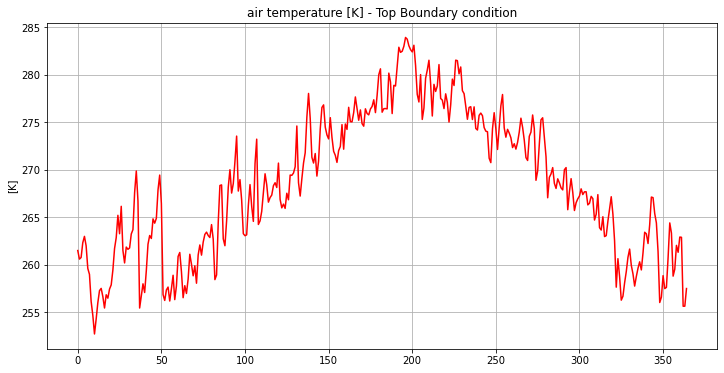

In [8]:
plt.figure(figsize=(12, 6))
plt.title('air temperature [K] - Top Boundary condition')
plt.plot(air_temp_2017_5yrs, 'r',label='air temperature [K]')
plt.ylabel('[K]')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
plt.grid(True)

#### 5. Plotting the observation results:

In [9]:
# Looping over the file names:

# Removing the hash lines in the intial part of the script
# https://stackoverflow.com/questions/11968998/remove-lines-that-contain-certain-string
remove_hashs = ['#']

# Opening the observation.dat file, 
# removing the lines with a hash and storing it in a new file - observation_2.dat

# P - Peat
for j in range(len(params)):
    for k in range(len(sim_number)):
        old_file_name = locals()['file_observation_P'+f'{params[j]}{sim_number[k]}']
        new_file_name = locals()['file_obs_name_P'+ f'{params[j]}{sim_number[k]}']
        with open(f'{old_file_name}') as oldfile, open(f'{new_file_name}', 'w') as newfile:
            for line in oldfile:
                if not any(remove_hash in line for remove_hash in remove_hashs):
                    newfile.write(line)
        
# M - Mineral
for j in range(len(params)):
    for k in range(len(sim_number)):
        old_file_name = locals()['file_observation_M'+f'{params[j]}{sim_number[k]}']
        new_file_name = locals()['file_obs_name_M'+ f'{params[j]}{sim_number[k]}']
        with open(f'{old_file_name}') as oldfile, open(f'{new_file_name}', 'w') as newfile:
            for line in oldfile:
                if not any(remove_hash in line for remove_hash in remove_hashs):
                    newfile.write(line)
                    
# B - Bedrock
for j in range(len(params)):
    for k in range(len(sim_number)):
        old_file_name = locals()['file_observation_B'+f'{params[j]}{sim_number[k]}']
        new_file_name = locals()['file_obs_name_B'+ f'{params[j]}{sim_number[k]}']
        with open(f'{old_file_name}') as oldfile, open(f'{new_file_name}', 'w') as newfile:
            for line in oldfile:
                if not any(remove_hash in line for remove_hash in remove_hashs):
                    newfile.write(line)
        


*Maybe we can combine the above and below cell*

In [10]:
# Reading the csv file and adjusting the index to the required time format
# Coverting saturation to VWC [Liquid]: VWC = saturation * porosity
porosity_peat = 0.5 # Peat layer until 0.385
porosity_mineral = 0.3 # Mineral layer until 2.24 m
depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]



# P - Peat
for j in range(len(params)):
    for k in range(len(sim_number)):
        obs_file_name = locals()['file_obs_name_P'+ f'{params[j]}{sim_number[k]}']
        
        locals()['df_P'+ str(params[j]) + str(sim_number[k])] = pd.read_csv(f'{obs_file_name}', sep=' ')
        locals()['df_P'+ str(params[j]) + str(sim_number[k])]['time [days]'] = locals()['df_P'+ str(params[j]) + str(sim_number[k])]['time [s]']/86400
        locals()['df_P'+ str(params[j]) + str(sim_number[k])].index = locals()['df_P'+ str(params[j]) + str(sim_number[k])]['time [days]']
        for depth in depths:
            if depth < 0.385:
                locals()['df_P'+ str(params[j]) + str(sim_number[k])][f'Soil moisture at - {depth} m (VWC %)'] = locals()['df_P'+ str(params[j]) + str(sim_number[k])].loc[:,f'point -{depth} saturation liquid']*porosity_peat*100
            else:
                locals()['df_P'+ str(params[j]) + str(sim_number[k])][f'Soil moisture at - {depth} m (VWC %)'] = locals()['df_P'+ str(params[j]) + str(sim_number[k])].loc[:,f'point -{depth} saturation liquid']*porosity_mineral*100

# M - Mineral
for j in range(len(params)):
    for k in range(len(sim_number)):
        obs_file_name = locals()['file_obs_name_M'+ f'{params[j]}{sim_number[k]}']
        
        locals()['df_M'+ str(params[j]) + str(sim_number[k])] = pd.read_csv(f'{obs_file_name}', sep=' ')
        locals()['df_M'+ str(params[j]) + str(sim_number[k])]['time [days]'] = locals()['df_M'+ str(params[j]) + str(sim_number[k])]['time [s]']/86400
        locals()['df_M'+ str(params[j]) + str(sim_number[k])].index = locals()['df_M'+ str(params[j]) + str(sim_number[k])]['time [days]']
        for depth in depths:
            if depth < 0.385:
                locals()['df_M'+ str(params[j]) + str(sim_number[k])][f'Soil moisture at - {depth} m (VWC %)'] = locals()['df_M'+ str(params[j]) + str(sim_number[k])].loc[:,f'point -{depth} saturation liquid']*porosity_peat*100
            else:
                locals()['df_M'+ str(params[j]) + str(sim_number[k])][f'Soil moisture at - {depth} m (VWC %)'] = locals()['df_M'+ str(params[j]) + str(sim_number[k])].loc[:,f'point -{depth} saturation liquid']*porosity_mineral*100

# B - Bedrock
for j in range(len(params)):
    for k in range(len(sim_number)):
        obs_file_name = locals()['file_obs_name_B'+ f'{params[j]}{sim_number[k]}']
        
        locals()['df_B'+ str(params[j]) + str(sim_number[k])] = pd.read_csv(f'{obs_file_name}', sep=' ')
        locals()['df_B'+ str(params[j]) + str(sim_number[k])]['time [days]'] = locals()['df_B'+ str(params[j]) + str(sim_number[k])]['time [s]']/86400
        locals()['df_B'+ str(params[j]) + str(sim_number[k])].index = locals()['df_B'+ str(params[j]) + str(sim_number[k])]['time [days]']
        for depth in depths:
            if depth < 0.385:
                locals()['df_B'+ str(params[j]) + str(sim_number[k])][f'Soil moisture at - {depth} m (VWC %)'] = locals()['df_B'+ str(params[j]) + str(sim_number[k])].loc[:,f'point -{depth} saturation liquid']*porosity_peat*100
            else:
                locals()['df_B'+ str(params[j]) + str(sim_number[k])][f'Soil moisture at - {depth} m (VWC %)'] = locals()['df_B'+ str(params[j]) + str(sim_number[k])].loc[:,f'point -{depth} saturation liquid']*porosity_mineral*100



In [11]:
# During the simulations, the porosity values of peat and mineral were kept constant for all simulations except when the peat and mineral porosity was varied in their respective simulations
# Therefore we have to change the VWC for these results.
porosity_peat_range = [0.3, 0.5, 0.9] # Peat layer until 0.385
porosity_mineral_range = [0.2, 0.3, 0.5] # Mineral layer until 2.24
depths_peat = [0.04, 0.2] # Since Peat layer until 0.385
depths_mineral = [0.4, 0.8, 1.2, 1.6] # Mineral layer until 2.24 m

# Changing the VWC for peat
for i in range(len(porosity_peat_range)):
    for depth in depths_peat:
            locals()['df_P'+'por'+str(i)].loc[:,f'Soil moisture at - {depth} m (VWC %)'] = locals()['df_P'+'por'+str(i)].loc[:,f'Soil moisture at - {depth} m (VWC %)']*(porosity_peat_range[i]/porosity_peat)

# Changing the VWC for mineral
for i in range(len(porosity_mineral_range)):
    for depth in depths_mineral:
            locals()['df_M'+'por'+str(i)].loc[:,f'Soil moisture at - {depth} m (VWC %)'] = locals()['df_M'+'por'+str(i)].loc[:,f'Soil moisture at - {depth} m (VWC %)']*(porosity_mineral_range[i]/porosity_mineral)

In [12]:
df_Ppor0.head()

,time [s],water content [mol],point -0.01 temperature [K],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],...,point -1.6 saturation ice,point -5.0 saturation ice,point -10.0 saturation ice,time [days],Soil moisture at - 0.04 m (VWC %),Soil moisture at - 0.2 m (VWC %),Soil moisture at - 0.4 m (VWC %),Soil moisture at - 0.8 m (VWC %),Soil moisture at - 1.2 m (VWC %),Soil moisture at - 1.6 m (VWC %)
time [days],,,,,,,,,,,,,,,,,,,,,
0.0,0.0,690701.154694,270.150000,270.150000,270.150000,270.150000,270.150000,270.150000,270.150000,270.150000,...,0.900467,0.949996,0.949996,0.0,3.739515,2.985979,2.985979,2.985979,2.985979,2.985977
1.0,86400.0,690701.154695,260.822666,261.880831,263.473905,265.671185,268.158366,269.756783,270.085682,270.145365,...,0.900498,0.949996,0.949996,1.0,3.435870,2.531478,2.712305,2.914572,2.973428,2.985060
2.0,172800.0,690701.154695,260.919600,261.617718,262.700171,264.348270,266.669860,268.953862,269.811774,270.100349,...,0.900791,0.949996,0.949996,2.0,3.431880,2.466546,2.592250,2.799416,2.923841,2.976256
3.0,259200.0,690701.154695,262.401184,262.753404,263.336021,264.349950,266.065179,268.283311,269.458135,270.011379,...,0.901354,0.949996,0.949996,3.0,3.450097,2.466620,2.554013,2.724651,2.867657,2.959378
4.0,345600.0,690701.154695,263.052250,263.318855,263.752845,264.504337,265.836407,267.811362,269.106530,269.886047,...,0.902110,0.949996,0.949996,4.0,3.460247,2.473472,2.540720,2.680176,2.818808,2.936708


<AxesSubplot:xlabel='time [days]'>

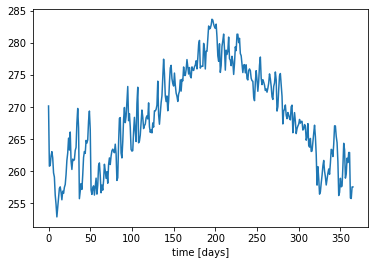

In [13]:
df_Bpor2['point -0.01 temperature [K]'].plot()

#### Plotting the values - An example:
- An example:
##### 1. Subsurface temperature

In [14]:
df_observation = df_Ppor0.copy()

### Plotting temperature, saturation of liquid, and saturation of ice

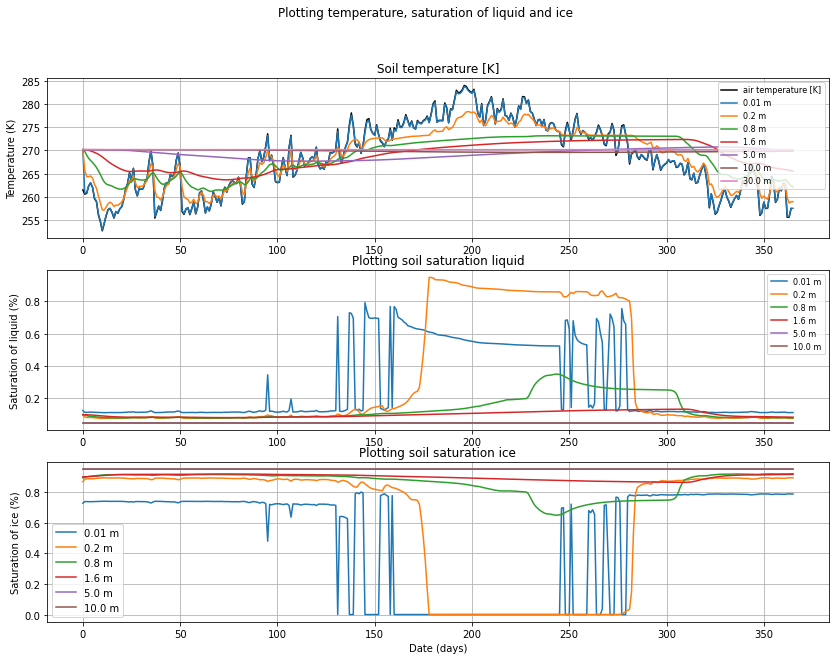

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
fig.set_size_inches(w=14,h=10)
fig.suptitle('Plotting temperature, saturation of liquid and ice')

ax1.set_title('Soil temperature [K]')
ax1.plot(air_temp_2017_5yrs, 'k',label='air temperature [K]')
ax1.plot(df_observation['point -0.01 temperature [K]'],label='0.01 m')
#ax1.plot(df_observation['point -0.04 temperature [K]'],label='0.04 m')
ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
ax1.plot(df_observation['point -0.8 temperature [K]'],label='0.8 m')
#ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
ax1.plot(df_observation['point -1.6 temperature [K]'],label='1.6 m')
ax1.plot(df_observation['point -5.0 temperature [K]'],label='5.0 m')
ax1.plot(df_observation['point -10.0 temperature [K]'],label='10.0 m')
#ax1.plot(df_observation['point -20.0 temperature [K]'],label='20.0 m')
ax1.plot(df_observation['point -30.0 temperature [K]'],label='30.0 m')
#ax1.plot(df_observation['point -40.0 temperature [K]'],label='40.0 m')

ax1.set_ylabel('Temperature (K)')
#ax1.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax1.set_xlabel('Date (days)')
ax1.legend(fontsize=8)
ax1.grid(True)

ax2.set_title('Plotting soil saturation liquid')
ax2.plot(df_observation['point -0.01 saturation liquid'],label='0.01 m')
#ax2.plot(df_observation['point -0.04 saturation liquid'],label='0.04 m')
ax2.plot(df_observation['point -0.2 saturation liquid'],label='0.2 m')
#ax2.plot(df_observation['point -0.4 saturation liquid'],label='0.4 m')
ax2.plot(df_observation['point -0.8 saturation liquid'],label='0.8 m')
#ax2.plot(df_observation['point -1.2 saturation liquid'],label='1.2 m')
ax2.plot(df_observation['point -1.6 saturation liquid'],label='1.6 m')
ax2.plot(df_observation['point -5.0 saturation liquid'],label='5.0 m')
ax2.plot(df_observation['point -10.0 saturation liquid'],label='10.0 m')

ax2.set_ylabel('Saturation of liquid (%)')
#ax2.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax2.xlabel('Date (days)')
ax2.legend(fontsize=8)
ax2.grid(True)


ax3.set_title('Plotting soil saturation ice')
ax3.plot(df_observation['point -0.01 saturation ice'],label='0.01 m')
#ax3.plot(df_observation['point -0.04 saturation ice'],label='0.04 m')
ax3.plot(df_observation['point -0.2 saturation ice'],label='0.2 m')
#ax3.plot(df_observation['point -0.4 saturation ice'],label='0.4 m')
ax3.plot(df_observation['point -0.8 saturation ice'],label='0.8 m')
#ax3.plot(df_observation['point -1.2 saturation ice'],label='1.2 m')
ax3.plot(df_observation['point -1.6 saturation ice'],label='1.6 m')
ax3.plot(df_observation['point -5.0 saturation ice'],label='5.0 m')
ax3.plot(df_observation['point -10.0 saturation ice'],label='10.0 m')

ax3.set_ylabel('Saturation of ice (%)')
#ax3.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax3.set_xlabel('Date (days)')
ax3.legend()
ax3.grid(True)

### Plotting the temperature for different porosity values at different depths

Text(0, 0.5, 'Temperature (K)')

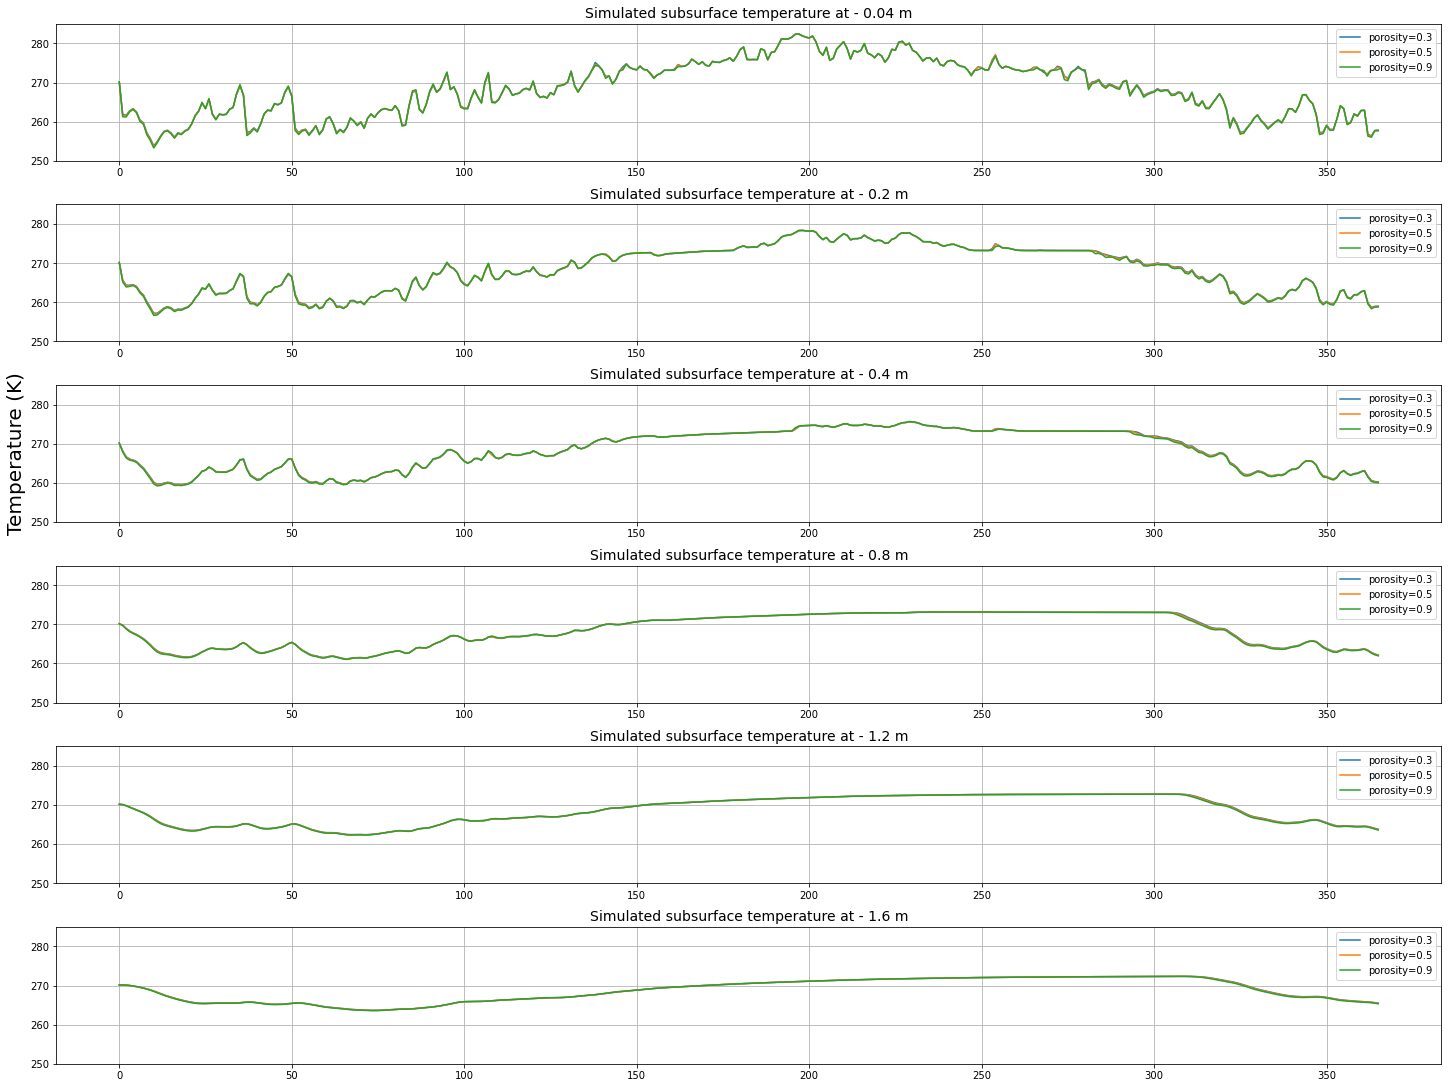

In [16]:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

plt.title('Plotting soil temperature at different depths [K]')

P_por_values = [0.3, 0.5, 0.9]

depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

for j, depth in enumerate(depths):
    for i, values in enumerate(P_por_values):
        locals()['f2_ax'+str(j+1)].plot(locals()[f"df_Ppor{i}"][f'point -{depth} temperature [K]'], label=f'porosity={values}')
        locals()['f2_ax'+str(j+1)]
        locals()['f2_ax'+str(j+1)].set_title(f'Simulated subsurface temperature at - {depth} m', fontsize=14)
        #f2_ax1.legend()
        locals()['f2_ax'+str(j+1)].grid(True)
        locals()['f2_ax'+str(j+1)].legend()
        locals()['f2_ax'+str(j+1)].set_ylim(250,285)
    

f2_ax3.set_ylabel('Temperature (K)', fontsize=20)
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#plt.xlabel('Date (days)')
#plt.legend()
#plt.grid(True)

#### Comments:
- The influence of porosity is not prominent


### Plotting the subsurface moisture for different porosity values at different depths

Text(0, 0.5, 'Saturation of liquid (%)')

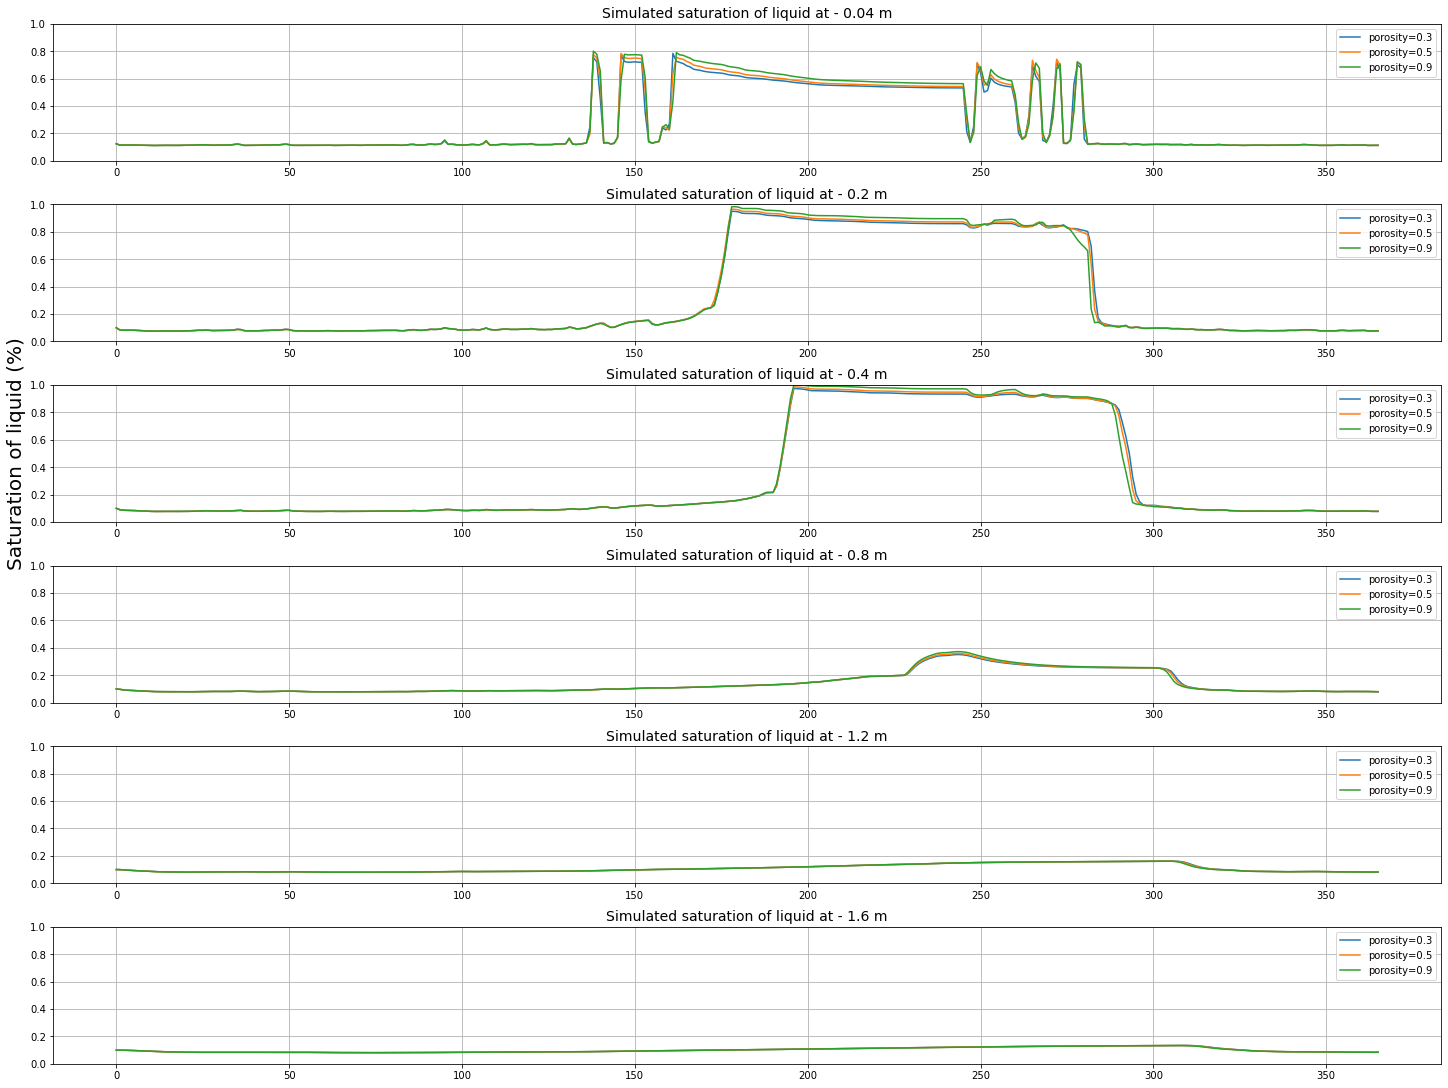

In [17]:
### Plotting the subsurface moisture for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

plt.title('Plotting subsurface moisture at different depths')

P_por_values = [0.3, 0.5, 0.9]


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

for j, depth in enumerate(depths):
    for i, values in enumerate(P_por_values):
        locals()['f2_ax'+str(j+1)].plot(locals()[f"df_Ppor{i}"][f'point -{depth} saturation liquid'], label=f'porosity={values}')
        locals()['f2_ax'+str(j+1)]
        locals()['f2_ax'+str(j+1)].set_title(f'Simulated saturation of liquid at - {depth} m', fontsize=14)
        #f2_ax1.legend()
        locals()['f2_ax'+str(j+1)].grid(True)
        locals()['f2_ax'+str(j+1)].legend()
        locals()['f2_ax'+str(j+1)].set_ylim(0,1.0)
    

f2_ax3.set_ylabel('Saturation of liquid (%)', fontsize=20)
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#plt.xlabel('Date (days)')
#plt.legend()
#plt.grid(True)

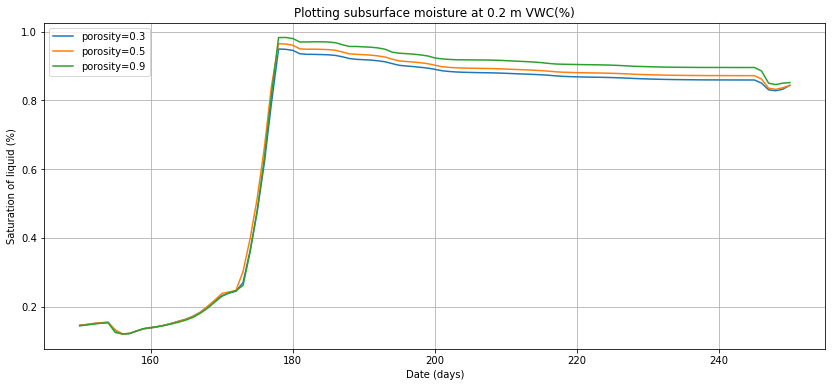

In [18]:
### Plotting the soil temperature at 0.2 m [K]

plt.figure(figsize=(14,6))
plt.title('Plotting subsurface moisture at 0.2 m VWC(%)')

P_por_values = [0.3, 0.5, 0.9]




for i, values in enumerate(P_por_values):
    plt.plot(locals()[f"df_Ppor{i}"]['point -0.2 saturation liquid'][150:250], label=f'porosity={values}')

plt.ylabel('Saturation of liquid (%)')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlabel('Date (days)')
plt.legend()
plt.grid(True)

#### Comments:
- The influence on moisture due to porosity is not prominent.
- The influence on moisture (little) is observed during the summer when the permafrost thaws. As the porosity increases, saturation of liquid also increases.   

### 7. Comparing the simulation results with the measurements
- The measurement data is evaluated in the file 'AWS_final_metdata_2015_20.ipynb' - To get a better overview, view this Jupyter Notebook

In [19]:
filename_measurements

'../Data/Data_Yakou/Yakou_met_data_ITP_rk/Final_data_excelsheet/AWS_Yakou_ITP_Data_2015-20.xlsx'

In [20]:
df_AWS = pd.read_excel(f'{filename_measurements}',index_col=0,parse_dates=True) 

In [22]:
df_AWS_details = pd.read_excel('../Data/Data_Yakou/Available_data.xlsx', sheet_name='AWS_Yakou_ITP_Data_2019_extract',index_col=0,parse_dates=True)  
df_AWS_details.head()

,Parameter,Product Name & Direction,Variable name,Depth/Height [m],Time steps [mins],Time interval,Units,Comments
Sl.No.,,,,,,,,
1,Wind speed at 10 m (m/s),"010C/020C; 10 m, north",WS_10m,10.0,10,01.01.2019 00:00 - 31.12.2019 23:50,m/s,NaN
2,Wind direction at 10 m (°),"010C/020C; 10 m, north",WD_10m,10.0,10,01.01.2019 00:00 - 31.12.2019 23:50,°,Why is the data all red?
3,Air temperature at 5 m (°C),"HMP45C; 5 m, north",Ta_5m,5.0,10,01.01.2019 00:00 - 31.12.2019 23:50,°C,NaN
4,Relative humidity at 5 m (%),"HMP45C; 5 m, north",RH_5m,5.0,10,01.01.2019 00:00 - 31.12.2019 23:50,%,Is it relative? Says RH - Hence should be rela...
5,Precipitation at 10 m (mm),rain gauge (TE525M; 10 m),Rain,10.0,10,01.01.2019 00:00 - 31.12.2019 23:50,mm,Precipitation measurement at 10 m? Seems odd


In [23]:
# Dropping an unnecessary column:
df_AWS.drop(['Unnamed: 34'], axis=1,inplace=True)

In [24]:
### Renaming the columns - 
data_AWS = df_AWS.copy()
data_AWS.columns = df_AWS_details['Parameter'].values
data_AWS.columns

Index(['Wind speed at 10 m (m/s)', 'Wind direction at 10 m (°)',
       'Air temperature at 5 m (°C)', 'Relative humidity at 5 m (%)',
       'Precipitation at 10 m (mm)', 'Air pressure (hPa)',
       'Infrared temperature (°C)', 'Infrared temperature (°C)', 'PAR_down',
       'PAR_up', 'Incoming shortwave radiation (W/m^2)',
       'Outgoing shortwave radiation (W/m^2)',
       'Incoming longwave radiation (W/m^2)',
       'Outgoing longwave radiation (W/m^2)', 'Net radiation (W/m^2)',
       'Soil heat flux at - 0.06 m (W/m^2) - 1',
       'Soil heat flux at - 0.06 m (W/m^2) - 2',
       'Soil heat flux at - 0.06 m (W/m^2) - 3',
       'Soil moisture at - 0.04 m (%)', 'Soil moisture at - 0.1 m (%)',
       'Soil moisture at - 0.2 m (%)', 'Soil moisture at - 0.4 m (%)',
       'Soil moisture at - 0.8 m (%)', 'Soil moisture at - 1.2 m (%)',
       'Soil moisture at - 1.6 m (%)', 'Soil temperature at - 0.00 m (°C)',
       'Soil temperature at - 0.04 m (°C)', 'Soil temperature at - 0.1 

### The data has -6999 values for missing data
- Therefore replacing -6999 with NaN vaues

In [25]:
data_AWS_syn = data_AWS.copy()
data_AWS_syn = data_AWS_syn.replace(-6999,None)

In [26]:
data_AWS_prep = data_AWS_syn.copy()

In [27]:
len(data_AWS_syn.index[np.where(np.isnan(data_AWS_syn))[0]])

40078

In [28]:
len(data_AWS_syn['Wind speed at 10 m (m/s)']), len(data_AWS_syn.columns), len(data_AWS_syn['Wind speed at 10 m (m/s)'])*len(data_AWS_syn.columns)

(278132, 33, 9178356)

### Comments:
- Few NaN values are present (278132/9178356 = 3.03% ). Since the data is available every 10 mins, we have considered to resample the data. 
- Find the number of NaN values in each column to identify where they are occuring and then decide weather to consider the data or not? - Try later

### Resampling the data to daily mean values 
* To observe the data on a seasonal scale

In [29]:
data_AWS_syn = data_AWS_syn.resample('D').mean()

#### Precipitation - Daily summation of the values are determined instead of mean

In [30]:
data_AWS_prep_dailysum = data_AWS_prep['Precipitation at 10 m (mm)'].resample('D').sum()

### Reducing the data to the year 2017

In [31]:
data_AWS_syn_2017 = data_AWS_syn.loc['2017']

# Changing the units of temperature to Kelvin

data_AWS_syn_2017['Soil temperature at - 0.04 m (K)'] = data_AWS_syn_2017['Soil temperature at - 0.04 m (°C)'] + 273.15
data_AWS_syn_2017['Soil temperature at - 0.2 m (K)'] = data_AWS_syn_2017['Soil temperature at - 0.2 m (°C)'] + 273.15
data_AWS_syn_2017['Soil temperature at - 0.4 m (K)'] = data_AWS_syn_2017['Soil temperature at - 0.4 m (°C)'] + 273.15
data_AWS_syn_2017['Soil temperature at - 0.8 m (K)'] = data_AWS_syn_2017['Soil temperature at - 0.8 m (°C)'] + 273.15
data_AWS_syn_2017['Soil temperature at - 1.2 m (K)'] = data_AWS_syn_2017['Soil temperature at - 1.2 m (°C)'] + 273.15
data_AWS_syn_2017['Soil temperature at - 1.6 m (K)'] = data_AWS_syn_2017['Soil temperature at - 1.6 m (°C)'] + 273.15

In [32]:
P_por_values

[0.3, 0.5, 0.9]

Text(0, 0.5, 'Temperature (K)')

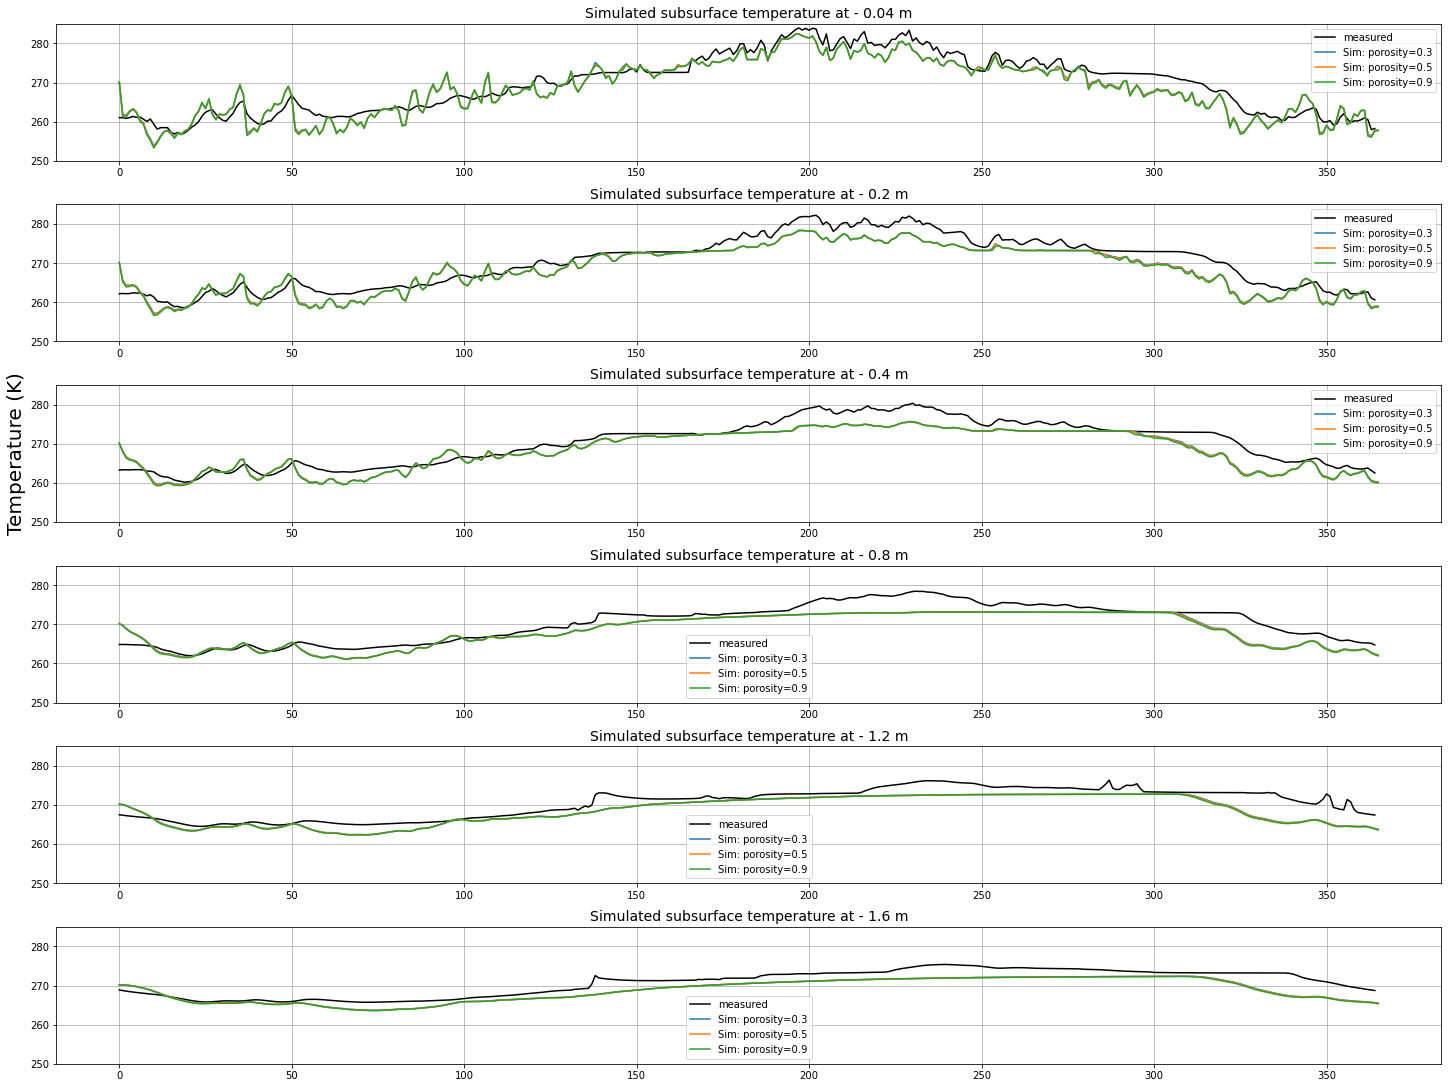

In [34]:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

plt.title('Plotting soil temperature at different depths [K]')


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = df_Ppor1.index

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period[0:365], data_AWS_syn_2017[f'Soil temperature at - {depth} m (K)'], 'k', label='measured')
    for i, values in enumerate(P_por_values):
        locals()['f2_ax'+str(j+1)].plot(locals()[f"df_Ppor{i}"][f'point -{depth} temperature [K]'], label=f'Sim: porosity={values}')
        locals()['f2_ax'+str(j+1)].set_title(f'Simulated subsurface temperature at - {depth} m', fontsize=14)
        #f2_ax1.legend()
        locals()['f2_ax'+str(j+1)].grid(True)
        locals()['f2_ax'+str(j+1)].legend()
        locals()['f2_ax'+str(j+1)].set_ylim(250,285)
    

f2_ax3.set_ylabel('Temperature (K)', fontsize=20)
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#plt.xlabel('Date (days)')
#plt.legend()
#plt.grid(True)

* Comments:
    * The results seems like the porosity does not have a significant influence on temperature


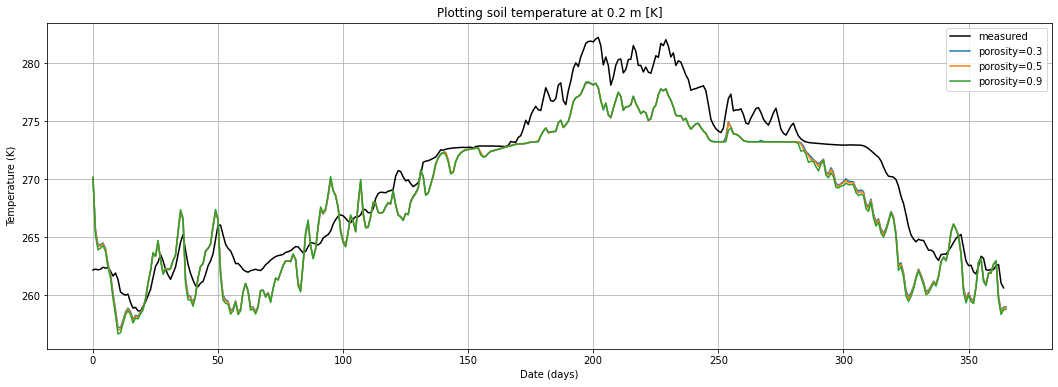

In [36]:
### Plotting the soil temperature at 0.2 m [K]

plt.figure(figsize=(18,6))
plt.title('Plotting soil temperature at 0.2 m [K]')


time_period = df_Ppor1.index

plt.plot(time_period[0:365], data_AWS_syn_2017[f'Soil temperature at - 0.2 m (K)'], 'k', label='measured')

for i, values in enumerate(P_por_values):
    plt.plot(locals()[f"df_Ppor{i}"]['point -0.2 temperature [K]'], label=f'porosity={values}')

plt.ylabel('Temperature (K)')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlabel('Date (days)')
plt.legend()
plt.grid(True)

##### Plotting the subsurface moisture for different alpha values at different depths

Text(0, 0.5, 'VWC (%)')

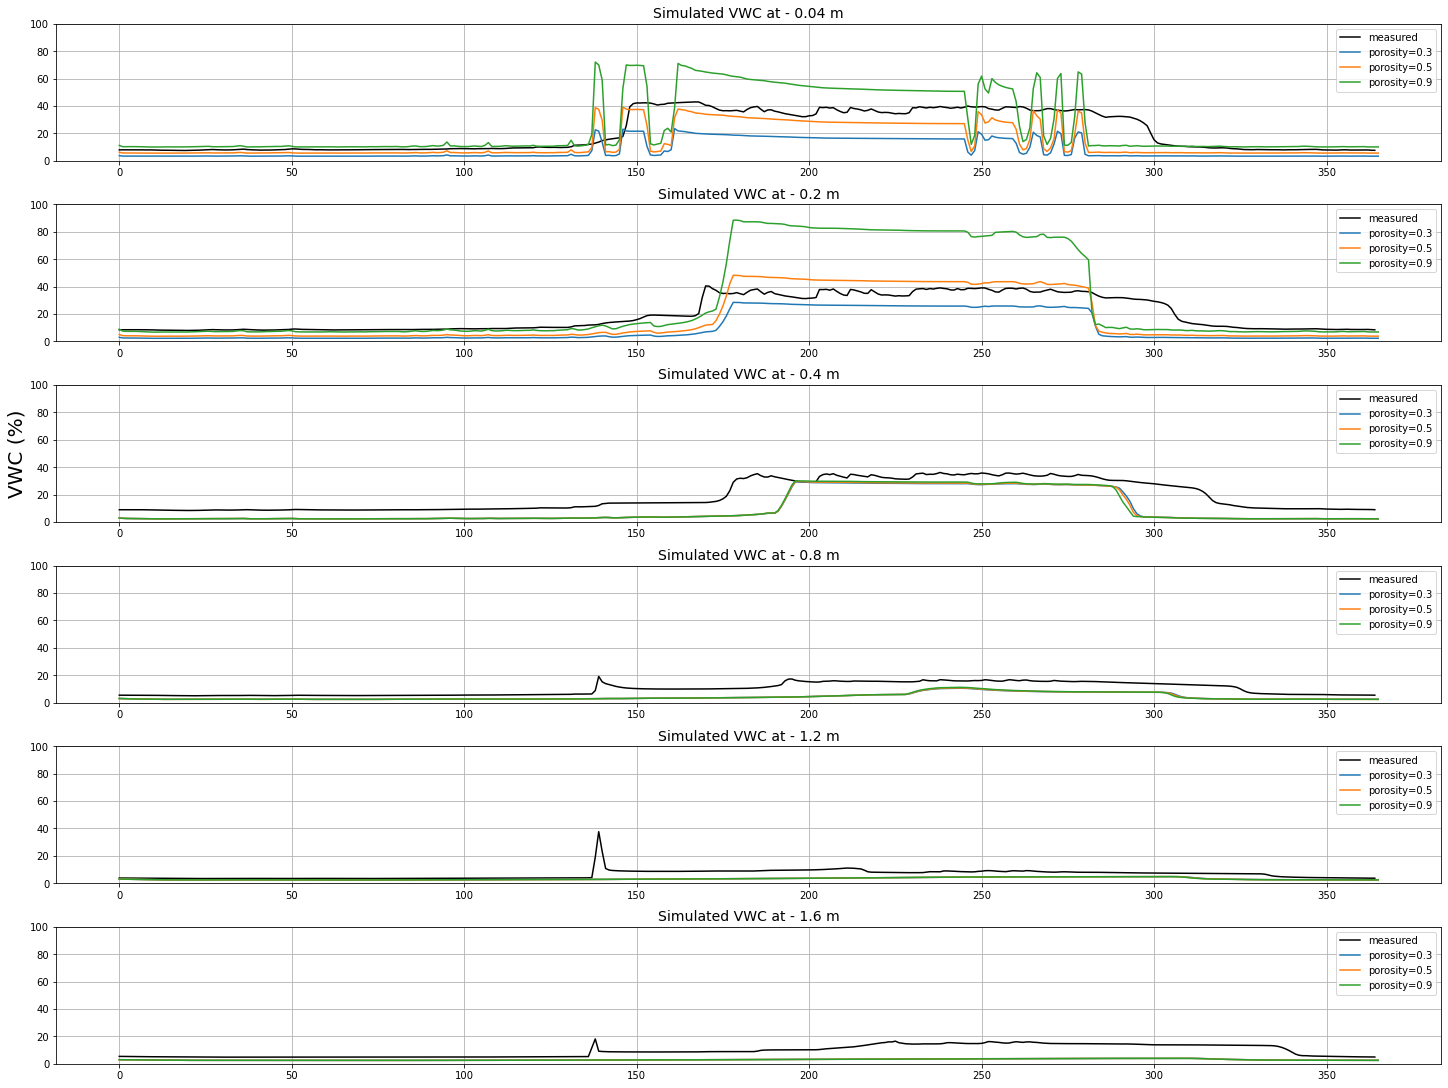

In [37]:
### Plotting the subsurface moisture for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

plt.title('Plotting subsurface moisture at different depths')


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = df_Ppor1.index

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period[0:365], data_AWS_syn_2017[f'Soil moisture at - {depth} m (%)'], 'k', label='measured')
    for i, values in enumerate(P_por_values):
        locals()['f2_ax'+str(j+1)].plot(locals()[f"df_Ppor{i}"][f'Soil moisture at - {depth} m (VWC %)'], label=f'porosity={values}')
        locals()['f2_ax'+str(j+1)]
        locals()['f2_ax'+str(j+1)].set_title(f'Simulated VWC at - {depth} m', fontsize=14)
        #f2_ax1.legend()
        locals()['f2_ax'+str(j+1)].grid(True)
        locals()['f2_ax'+str(j+1)].legend()
        locals()['f2_ax'+str(j+1)].set_ylim(0,100.0)
    

f2_ax3.set_ylabel('VWC (%)', fontsize=20)
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#plt.xlabel('Date (days)')
#plt.legend()
#plt.grid(True)

* Comments:


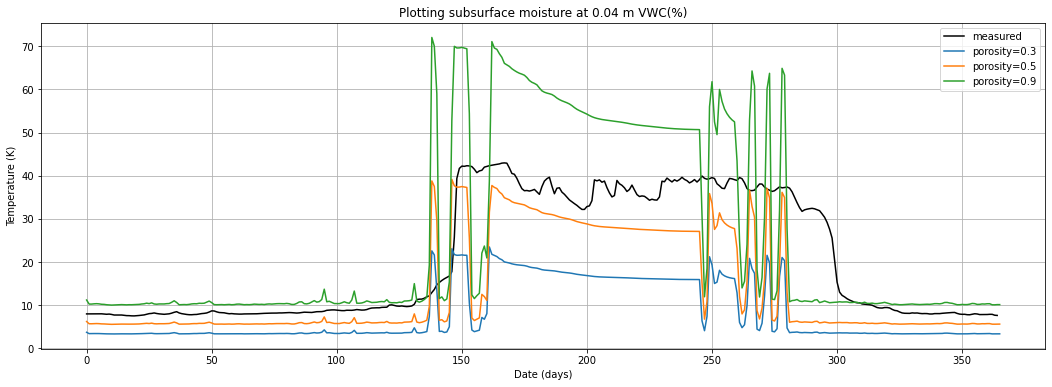

In [38]:
### Plotting the soil temperature at 0.2 m [K]

plt.figure(figsize=(18,6))
plt.title('Plotting subsurface moisture at 0.04 m VWC(%)')


time_period = df_Ppor1.index


plt.plot(time_period[0:365], data_AWS_syn_2017[f'Soil moisture at - 0.04 m (%)'], 'k', label='measured')

for i, values in enumerate(P_por_values):
    plt.plot(locals()[f"df_Ppor{i}"]['Soil moisture at - 0.04 m (VWC %)'], label=f'porosity={values}')

plt.ylabel('Temperature (K)')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlabel('Date (days)')
plt.legend()
plt.grid(True)

* Comments:


In [39]:
# Converting the index of observation dataframe:

df_simulated = df_Ppor1.copy()

# Slicing only 1 year of simulated data
df_simulated_2017 = df_simulated.loc[0:364]

# Changing the index
df_simulated_2017.index = data_AWS_syn_2017.index

df_simulated_2017.head()

,time [s],water content [mol],point -0.01 temperature [K],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],...,point -1.6 saturation ice,point -5.0 saturation ice,point -10.0 saturation ice,time [days],Soil moisture at - 0.04 m (VWC %),Soil moisture at - 0.2 m (VWC %),Soil moisture at - 0.4 m (VWC %),Soil moisture at - 0.8 m (VWC %),Soil moisture at - 1.2 m (VWC %),Soil moisture at - 1.6 m (VWC %)
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2017-01-01,0.0,691085.825634,270.150000,270.150000,270.150000,270.150000,270.150000,270.150000,270.150000,270.150000,...,0.900467,0.949996,0.949996,0.0,6.232526,4.976632,2.985979,2.985979,2.985979,2.985977
2017-01-02,86400.0,691085.825636,260.782092,261.643920,263.224674,265.485737,268.065312,269.736471,270.082235,270.145111,...,0.900500,0.949996,0.949996,1.0,5.720453,4.202397,2.703389,2.911200,2.972766,2.985010
2017-01-03,172800.0,691085.825636,260.891037,261.451229,262.512719,264.185065,266.556683,268.908572,269.798001,270.098246,...,0.900805,0.949996,0.949996,2.0,5.715703,4.099144,2.584721,2.793852,2.921499,2.975849
2017-01-04,259200.0,691085.825636,262.384931,262.659310,263.220797,264.234651,265.966193,268.227178,269.434526,270.006224,...,0.901386,0.949996,0.949996,3.0,5.747472,4.102687,2.548189,2.719050,2.864175,2.958421
2017-01-05,345600.0,691085.825636,263.040263,263.249240,263.667482,264.416331,265.753497,267.753671,269.076177,269.877314,...,0.902161,0.949996,0.949996,4.0,5.764922,4.115909,2.536046,2.675118,2.814871,2.935173


### 8. Finding the RMSE value - yearly average, monthly average, plotting time series RMSE value
1. Finding the yearly average
2. Finding the monthly average
3. Time series RMSE value

In [40]:
### Writing a function to find the RMSE value:
def RMSE_function(sim, measured, time_scale, name_VarDepth):
    """
    The function is written to find the RMSE (Root Mean Square Error) between the measured and simulated value.
    
    Parameters
    ------
    
    Input parameters:
    
    sim : Pandas dataframes series with daily simulated values. 
    
    measured: Pandas dataframes series with daily measured values. 
    
    time_scale : Choose the time scale in which you would like your results.
    
    (a). 'yearly' - The RMSE values are averaged for the entire year
    
    (b). 'monthly' - The RMSE values are averaged for the entire month
    
    (c). 'daily' - The daily RMSE values are the output. 
    
    name_VarDepth : Provide the name of the variable and the depth (Easy to create dataframe with different columns as Variable - Depths)
            
    Output parameters:
    
    rmse_yearly : Single value, Finds the RMSE between the simulated and measured - averages it over the year
    
    rmse_monthly : Pandas dataframe, Finds the RMSE between the simulated and measured - averaged over a month 
    
    
    """
    
    if time_scale == 'yearly':
        rmse_yearly = np.sqrt(((sim - measured) ** 2).mean())
        
        return rmse_yearly
    
    elif time_scale == 'monthly':
        
        # Creating a numpy array with month numericals from 1,1,2,3 ..12
        month = np.arange(1,13,1)
        
        # Creating a dataframe with monthly indexes
        rmse_monthly = pd.DataFrame(index=sim.resample('M').mean().index, data=np.arange(1,13,1),columns=[f'{name_VarDepth}'])

        for i in range(len(month)):

            # Extracting the monthly values from January - December
            sim_month = sim[f'2017-{month[i]}']
            measured_month = measured[f'2017-{month[i]}']

            
            # Finding the RMSE value and storing it in a dataframe
            rmse_monthly.iloc[i,0] = np.sqrt(((sim_month - measured_month)**2).mean())
            
        return rmse_monthly

In [41]:
### Example - Creating a loop to store the yearly and monthly RMSE values for all variables

# Depths - Note the numbering
depths = ['0.04','0.2','0.4','0.8','1.2','1.6']

# Creating a numpy array to store the rmse (yearly) values
rmse_yearly_temp = np.array([])
rmse_yearly_mois = np.array([])

# Creating a dataframe to store the monthly RMSE temperature and moisture
rmse_month_values = pd.DataFrame(index=df_simulated_2017['point -0.04 temperature [K]'].resample('M').mean().index, data=None, columns=None)



for i in range(len(depths)):
    
    # Calculating the yearly RMSE values - Temperature & Moisture
    sim_temp = df_simulated_2017[f'point -{depths[i]} temperature [K]']
    measured_temp = data_AWS_syn_2017[f'Soil temperature at - {depths[i]} m (K)']
    
    sim_mois = df_simulated_2017[f'Soil moisture at - {depths[i]} m (VWC %)']
    measured_mois = data_AWS_syn_2017[f'Soil moisture at - {depths[i]} m (%)']
    
    value_temp = RMSE_function(sim_temp, measured_temp, time_scale='yearly', name_VarDepth='Temp-1.6')
    rmse_yearly_temp = np.append(rmse_yearly_temp, value_temp)
    
    value_mois = RMSE_function(sim_mois, measured_mois, time_scale='yearly', name_VarDepth='Temp-1.6')
    rmse_yearly_mois = np.append(rmse_yearly_mois, value_mois)
    
    # Calculating the monthly RMSE values
    name_TempDepth = f'Temp-{depths[i]}'
    name_MoisDepth = f'Mois-{depths[i]}'
    
    rmse_month_values[f'{name_TempDepth}'] = RMSE_function(sim_temp, measured_temp, time_scale='monthly', name_VarDepth='{name_TempDepth}')
    rmse_month_values[f'{name_MoisDepth}'] = RMSE_function(sim_mois, measured_mois, time_scale='monthly', name_VarDepth='{name_MoisDepth}')

In [42]:
rmse_yearly_temp

array([2.78656973, 2.73771298, 2.66463726, 2.56618279, 2.5261418 ,
       2.27810034])

### Finding the yearly RMSE value for the individual parameters:
1. Find the RMSE value for the simulated and measured results. 
2. For one particular parameter - You will have 18 RMSE values {3 parameter values at 6 depths} - We can plot 'Porosity Vs RMSE' at the six depths in one plot. 
3. Keeping Step 2 in mind: Similarly we can calculate it for the four parameters: Porosity, Pore compressibility, Permeability, Density - We can plot this in four subfigures.
4. We also have three materials which can be plotted in three figures.

In [43]:
# Test
## Step 1 - Find the RMSE value for the simulated and measured results.

# Simulated results: (Excluding the initial value at T = 0)
sim = df_Ppor0['point -1.6 temperature [K]'][1:].values

# Measurements
measured = data_AWS_syn_2017['Soil temperature at - 1.6 m (K)'].values

RMSE_test = np.sqrt(((sim - measured) ** 2).mean())

RMSE_test

2.2686325827303513

### Storing the RMSE values

In [44]:
# We can store the RMSE values in a pandas dataframe with the index = depth and columns = porosity
depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]
P_por = [0.3, 0.5, 0.9]
RMSE_Ppor_temp = pd.DataFrame(index=depths, columns=P_por)
RMSE_Ppor_mois = pd.DataFrame(index=depths, columns=P_por)
RMSE_Ppor_mois

,0.3,0.5,0.9
0.04,NaN,NaN,NaN
0.20,NaN,NaN,NaN
0.40,NaN,NaN,NaN
0.80,NaN,NaN,NaN
1.20,NaN,NaN,NaN
1.60,NaN,NaN,NaN


In [45]:
# We can store the RMSE values in a pandas dataframe with the index = depth and columns = parameter
depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

# Storing the porosity, pore compressibility, permeability, density for peat
P_por = [0.3, 0.5, 0.9]
P_porc = [1.00E-08, 1.00E-07, 1.00E-06]
P_perm = [1e-12, 1e-11, 1e-10]
P_den = [500, 700, 900]

# Storing the porosity, pore compressibility, permeability, density for mineral
M_por = [0.2, 0.3, 0.5]
M_porc = [1e-09, 1e-08, 1e-07]
M_perm = [1e-14, 1e-13, 1e-12]
M_den = [1700, 1900, 2300]

# Storing the porosity, pore compressibility, permeability, density for bedrock
B_por = [0.2, 0.3, 0.5]
B_porc = [1e-10, 1e-09, 1e-08]
B_perm = [1e-15, 1e-14, 1e-13]
B_den = [1500, 2000, 2500]

# Creating a list for the materials and the parameters
materials = ['P', 'M', 'B']
Phy_parameters = ['por','porc','perm','den']


# Creating the pandas dataframe dynamically for the four physical parameters and the three materials
for a, material in enumerate(materials):
    for b, param in enumerate(Phy_parameters):
        locals()['RMSE_'+f'{material}{param}'+'_temp'] = pd.DataFrame(index=depths, columns=locals()[f'{material}_{param}'])
        locals()['RMSE_'+f'{material}{param}'+'_mois'] = pd.DataFrame(index=depths, columns=locals()[f'{material}_{param}'])
        
    



In [46]:
RMSE_Ppor_temp

,0.3,0.5,0.9
0.04,NaN,NaN,NaN
0.20,NaN,NaN,NaN
0.40,NaN,NaN,NaN
0.80,NaN,NaN,NaN
1.20,NaN,NaN,NaN
1.60,NaN,NaN,NaN


In [47]:
# Storing the RMSE_values interatively
for a, material in enumerate(materials):
    for b, param in enumerate(Phy_parameters):
        for j, depth in enumerate(depths):
            for k in range(len(locals()[f'{material}_{param}'])):
                
                # Simulated value
                sim_temp = locals()[f'df_{material}{param}'+str(k)][f'point -{depth} temperature [K]'][1:].values
                sim_mois = locals()[f'df_{material}{param}'+str(k)][f'Soil moisture at - {depth} m (VWC %)'][1:].values
                # Measured value
                measured_temp = data_AWS_syn_2017[f'Soil temperature at - {depth} m (K)'].values
                measured_mois = data_AWS_syn_2017[f'Soil moisture at - {depth} m (%)'].values
        
                # Determining the RMSE value
                locals()['RMSE_'+f'{material}{param}'+'_temp'].iloc[j,k] = np.sqrt(((sim_temp - measured_temp) ** 2).mean())
                locals()['RMSE_'+f'{material}{param}'+'_mois'].iloc[j,k] = np.sqrt(((sim_mois - measured_mois) ** 2).mean())
                
                # Changing the datatype  to float64
                locals()['RMSE_'+f'{material}{param}'+'_temp'].astype('float64')
                locals()['RMSE_'+f'{material}{param}'+'_mois'].astype('float64')
                

In [48]:
RMSE_Ppor_temp

,0.3,0.5,0.9
0.04,3.04598,3.094896,3.184408
0.20,2.830797,2.870751,2.942046
0.40,2.701832,2.732931,2.784647
0.80,2.569362,2.595099,2.639913
1.20,2.525435,2.553899,2.602036
1.60,2.268633,2.28968,2.325125


In [49]:
# Check
measured_mois = data_AWS_syn_2017[f'Soil moisture at - 1.6 m (%)'].values
sim_mois = df_Ppor0['Soil moisture at - 1.6 m (VWC %)'][1:].values
np.sqrt(((measured_mois - sim_mois) ** 2).mean())

7.272091306459516

#### Porosity of peat

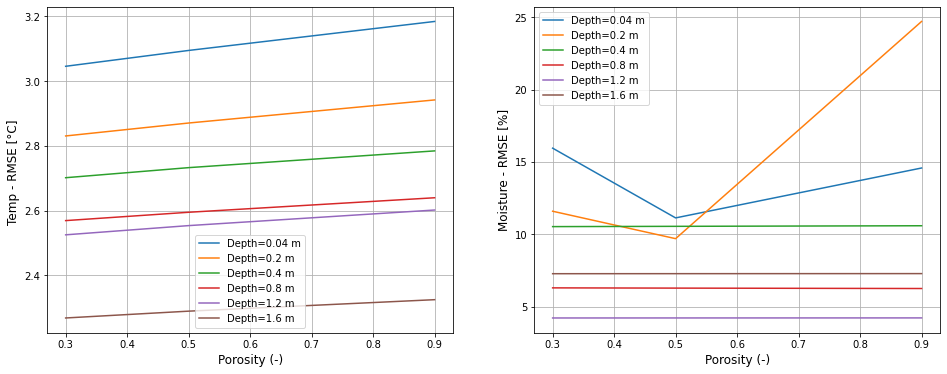

In [50]:
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
# Trial plot
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(16,6)


for i, values in enumerate(RMSE_Ppor_temp.index):
    ax1.plot(RMSE_Ppor_temp.iloc[i,:], label=f'Depth={values} m')
    ax2.plot(RMSE_Ppor_mois.iloc[i,:], label=f'Depth={values} m')
    
    #ax1.scatter(rmse_yearly_temp[i], depths[i], label=f'{depths[i]} m')
    #ax2.scatter(rmse_yearly_mois[i], depths[i], label=f'{depths[i]} m')

ax1.set_xlabel('Porosity (-)', fontsize=12)
ax1.set_ylabel('Temp - RMSE [°C] ', fontsize=12)
ax1.legend()
ax1.grid(True)

ax2.set_xlabel('Porosity (-)', fontsize=12)
ax2.set_ylabel('Moisture - RMSE [%]', fontsize=12)
ax2.legend()
ax2.grid(True)

Comments:
- The porosity seems to have little effect on the temperature. It appears that with the increase in porosity, the RMSE value for temperature also increases. hence lower porosity is preferred.
- The porosity effects are clearly observed with respect to moisture. As the porosity increases, the RMSE value decreases and then later on increases. A porosity of 0.5 is preferred.
- Note that the effects of change in porosity is seen at all measured depths in the Temp - RMSE value. For the moisture, the effects are only observed at 0.04 m and 0.2 m
- Assuming a porosity_peat = 0.5 seems to be ideal

#### Porosity of mineral

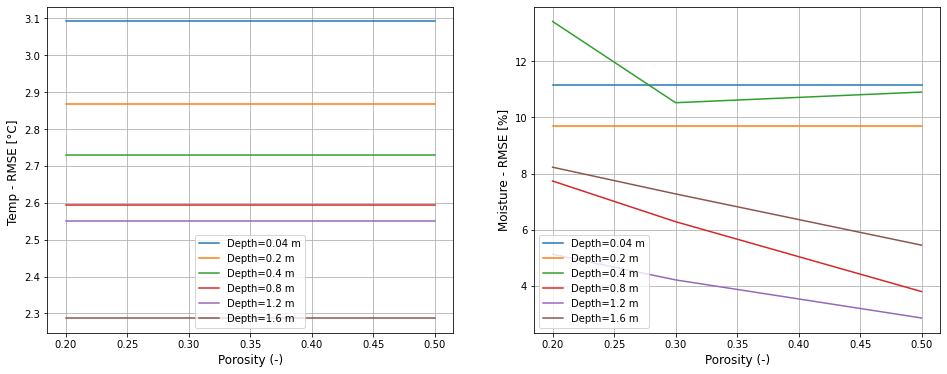

In [51]:
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
# Trial plot
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(16,6)


for i, values in enumerate(RMSE_Mpor_temp.index):
    ax1.plot(RMSE_Mpor_temp.iloc[i,:], label=f'Depth={values} m')
    ax2.plot(RMSE_Mpor_mois.iloc[i,:], label=f'Depth={values} m')
    
    #ax1.scatter(rmse_yearly_temp[i], depths[i], label=f'{depths[i]} m')
    #ax2.scatter(rmse_yearly_mois[i], depths[i], label=f'{depths[i]} m')

ax1.set_xlabel('Porosity (-)', fontsize=12)
ax1.set_ylabel('Temp - RMSE [°C] ', fontsize=12)
ax1.legend()
ax1.grid(True)

ax2.set_xlabel('Porosity (-)', fontsize=12)
ax2.set_ylabel('Moisture - RMSE [%]', fontsize=12)
ax2.legend()
ax2.grid(True)

Comments:
- The porosity seems to have no effect on the temperature.
- The porosity effects are clearly observed with respect to moisture at depths 0.4, 0.8, 1.2, & 1.6 m. As the porosity increases, the RMSE value decreases. 
- The porosity_mineral <=0.5 seems to be ideal

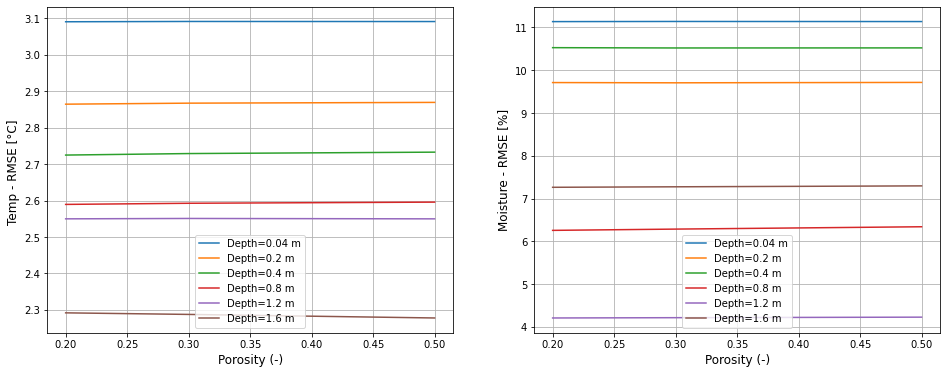

In [52]:
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
# Trial plot
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(16,6)


for i, values in enumerate(RMSE_Mpor_temp.index):
    ax1.plot(RMSE_Bpor_temp.iloc[i,:], label=f'Depth={values} m')
    ax2.plot(RMSE_Bpor_mois.iloc[i,:], label=f'Depth={values} m')
    
    #ax1.scatter(rmse_yearly_temp[i], depths[i], label=f'{depths[i]} m')
    #ax2.scatter(rmse_yearly_mois[i], depths[i], label=f'{depths[i]} m')

ax1.set_xlabel('Porosity (-)', fontsize=12)
ax1.set_ylabel('Temp - RMSE [°C] ', fontsize=12)
ax1.legend()
ax1.grid(True)

ax2.set_xlabel('Porosity (-)', fontsize=12)
ax2.set_ylabel('Moisture - RMSE [%]', fontsize=12)
ax2.legend()
ax2.grid(True)

Comments:
- Influence of parameters of bedrock is not seen!
- Assuming that porosity_bedrock = 0.4

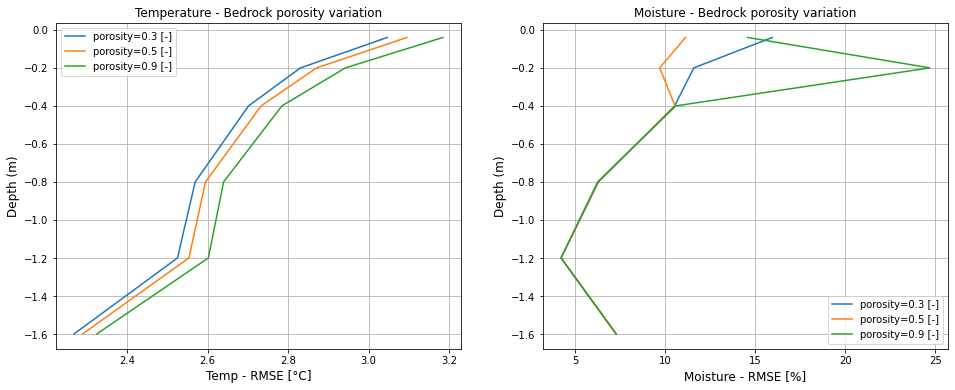

In [55]:
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
# Trial plot
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(16,6)
ax1.set_title('Temperature - Bedrock porosity variation')
ax2.set_title('Moisture - Bedrock porosity variation')

for i, values in enumerate(RMSE_Ppor_temp.columns):
    ax1.plot(RMSE_Ppor_temp.iloc[:,i].values, - RMSE_Ppor_temp.index, label=f'porosity={values} [-]')
    ax2.plot(RMSE_Ppor_mois.iloc[:,i].values, - RMSE_Ppor_mois.index, label=f'porosity={values} [-]')
    
    #ax1.scatter(rmse_yearly_temp[i], depths[i], label=f'{depths[i]} m')
    #ax2.scatter(rmse_yearly_mois[i], depths[i], label=f'{depths[i]} m')

ax1.set_xlabel('Temp - RMSE [°C]', fontsize=12)
ax1.set_ylabel('Depth (m)', fontsize=12)
ax1.legend()
ax1.grid(True)

ax2.set_xlabel('Moisture - RMSE [%]', fontsize=12)
ax2.set_ylabel('Depth (m)', fontsize=12)
ax2.legend()
ax2.grid(True)